In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#!pip install xgboost

In [4]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from numpy import absolute
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
import joblib
from scipy.signal import find_peaks
from scipy.integrate import trapz
import xgboost

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"
autotune = tf.data.AUTOTUNE
TF_ENABLE_ONEDNN_OPTS=0
config = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=8)

# https://stackoverflow.com/a/55541385
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# For reproducible results
def seed_all(s):
    random.seed(s)
    np.random.seed(s)
    tf.random.set_seed(s)
    os.environ['TF_CUDNN_DETERMINISTIC'] = '2'
    os.environ['PYTHONHASHSEED'] = str(s)

In [5]:
loaded_model = joblib.load('XGBregressWith642.joblib')

In [10]:

#loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4953, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=17, max_leaves=None,
             min_child_weight=6.294, missing=nan, monotone_constraints=None,
             n_estimators=131, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [15]:
# patient_signal = pd.read_csv('Data1SignalTestingModel.xlsx.csv', index_col=0)
# # patient_signal = patient_signal.values
# # patient_signal

In [19]:
patient_signal = pd.read_csv('testttttt.csv')
patient_signal = patient_signal.values
# patient_signal

In [20]:
locs, pks = find_peaks(ppg_signal_processed, distance = 70, height = 0.1)
#locs, pks

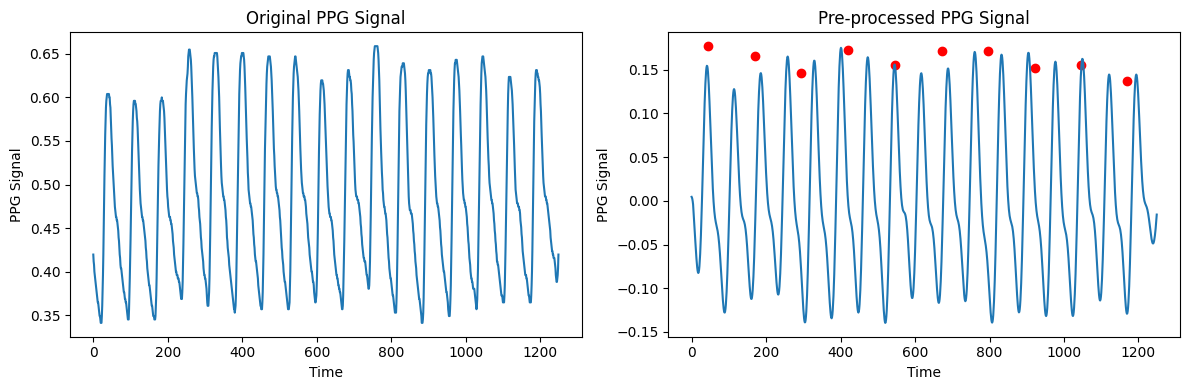

In [21]:
from scipy.signal import cheby2, sosfiltfilt, convolve
#Chevby2 Parameters
Fs = 125
Fn = Fs / 2
Fh = 0.5
Fl = 5
windowWidth = 8

num_signals_to_print = 1
i = -1

for i in range(num_signals_to_print):
    ppg_signal = patient_signal[i]
    time = np.arange(len(ppg_signal))

    # 1. Apply Chebyshev Type II bandpass filter
    wp = [Fh / Fn, Fl / Fn]
    ws = [(Fh - 0.5) / Fn, (Fl + 0.5) / Fn]
    N, Wn = cheby2(6, 20, wp, 'bandpass', analog=False, output='ba')
    sos = cheby2(6, 20, wp, 'bandpass', analog=False, output='sos')
    ppg_signal_processed = sosfiltfilt(sos, ppg_signal)

     # 2. Check for NaN or infinite values in ppg and remove them
    ppg_signal_processed[np.isnan(ppg_signal_processed) | np.isinf(ppg_signal_processed)] = 0

     # 3. Apply moving average
    kernel = np.ones(windowWidth) / windowWidth
    ppg_signal_processed = np.convolve(ppg_signal_processed, kernel, mode='same')

   # Plot side-by-side comparison
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(time, ppg_signal)
    plt.xlabel('Time')
    plt.ylabel('PPG Signal')
    plt.title('Original PPG Signal')

    plt.subplot(1, 2, 2)
    plt.plot(time, ppg_signal_processed)
    plt.scatter(locs,pks['peak_heights'],color="red")
    plt.xlabel('Time')
    plt.ylabel('PPG Signal')
    plt.title('Pre-processed PPG Signal')

    plt.tight_layout()
    plt.show()


In [12]:
#patient_signal.shape

In [13]:
#ppg_signal_processed

In [14]:
#ppg_signal_processed.shape

Heart rate Calculate

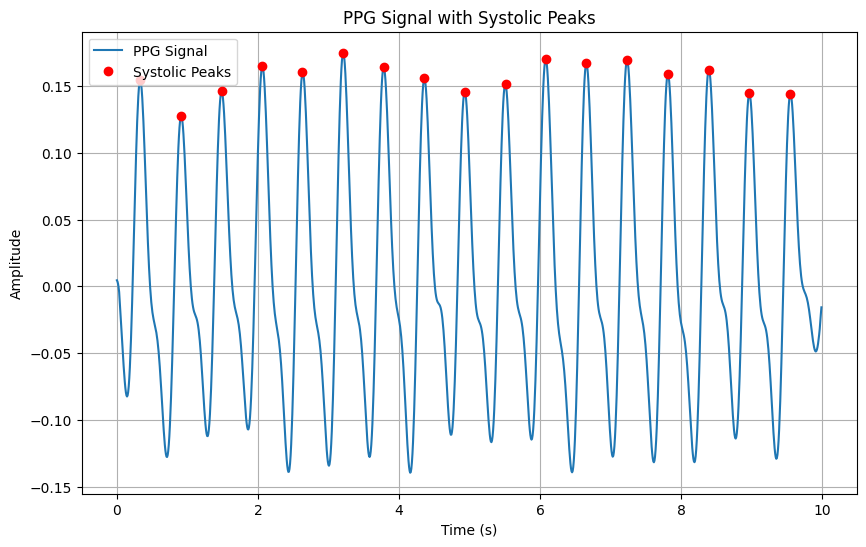

Detected systolic peaks: {'peak_heights': array([0.15445062, 0.1277965 , 0.14604093, 0.16505049, 0.16030019,
       0.17499882, 0.16424696, 0.15593866, 0.14591564, 0.15137223,
       0.17032209, 0.16719964, 0.16929335, 0.15920229, 0.16242597,
       0.14448506, 0.14444587])}
Inter-beat intervals (IBIs): [0.584 0.576 0.576 0.568 0.576 0.576 0.576 0.576 0.576 0.568 0.576 0.576
 0.584 0.576 0.576 0.584]
Heart Rate: 104.08 BPM


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

# Simulated PPG signal (replace with your actual PPG signal data)
fs = 125  # Sampling frequency in Hz
t = np.arange(0, 10, 1/fs)  # Time vector
ppg_signal = ppg_signal_processed

# Find systolic peaks using SciPy's find_peaks function
locs, peaks  = find_peaks(ppg_signal_processed, distance = 70, height = 0.1 )

# Calculate inter-beat intervals (IBIs) in seconds
ibis = np.diff(locs) / fs

# Calculate heart rate in beats per minute (BPM)
heart_rate = 60 / np.mean(ibis)

# Plot PPG signal and detected peaks
plt.figure(figsize=(10, 6))
plt.plot(t, ppg_signal, label='PPG Signal')
plt.plot(t[locs], ppg_signal[locs], 'ro', label='Systolic Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('PPG Signal with Systolic Peaks')
plt.grid(True)
plt.show()

print(f"Detected systolic peaks: {peaks}")
print(f"Inter-beat intervals (IBIs): {ibis}")
print(f"Heart Rate: {heart_rate:.2f} BPM")


In [23]:
#len(pks['peak_heights'])

In [24]:
#pks

In [25]:
#locs

In [26]:
feature = []
feature.append([
      (len(pks['peak_heights'])) / (10 / 60),  #Heart rate
      sum(pks['peak_heights']) / len (locs), #md_so
  ])
#feature



In [27]:
#len(locs['peak_heights'])

In [34]:
#not use
pks1, locs1 = find_peaks(ppg_signal_processed, distance = 70, height = 0.1)
diff1_ppg = np.diff(ppg_signal_processed)
pks2, locs2 = find_peaks(diff1_ppg, distance = 10,height = 0.01)
diff1_time = np.diff(time)
diff2_ppg = np.diff(diff1_ppg)
pks3, locs3 = find_peaks(diff2_ppg, distance = 10,height = 0.0016)


In [35]:
locs1, pks1 = find_peaks(ppg_signal_processed, distance = 70, height = 0.1)
diff1_ppg = np.diff(ppg_signal_processed)
locs2, pks2 = find_peaks(diff1_ppg, distance = 10,height = 0.01)
diff1_time = np.diff(time)
locs3, pks3 = find_peaks(diff2_ppg, distance = 10,height = 0.0016)

In [29]:
#locs1, pks1

In [30]:
#pks2, locs2

In [31]:
#pks3, locs3

Text(0.5, 1.0, 'Original PPG Signal')

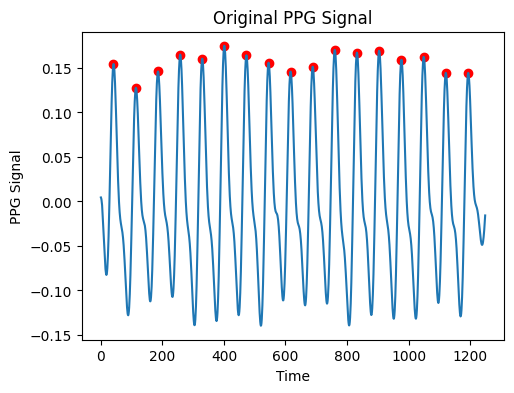

In [36]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1250), ppg_signal_processed) #diff 1 time 1250 -> 1249
plt.scatter(locs1, pks1['peak_heights'],color="red")
plt.xlabel('Time')
plt.ylabel('PPG Signal')
plt.title('Original PPG Signal')

Text(0.5, 1.0, 'Original PPG Signal')

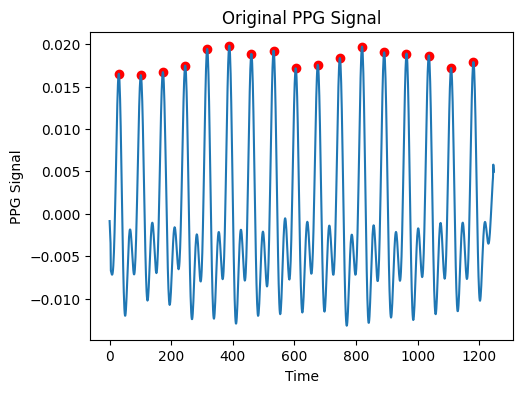

In [37]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1249), diff1_ppg) #diff 1 time 1250 -> 1249
plt.scatter(locs2, pks2['peak_heights'],color="red")
plt.xlabel('Time')
plt.ylabel('PPG Signal')
plt.title('Original PPG Signal')

Text(0.5, 1.0, 'Original PPG Signal')

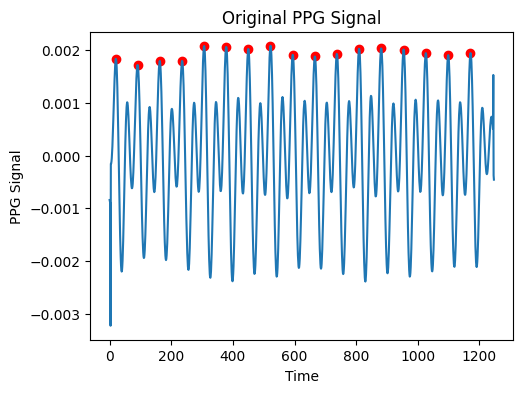

In [38]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1248), diff2_ppg) #diff 1 time 1250 -> 1249
plt.scatter(locs3, pks3['peak_heights'],color="red")
plt.xlabel('Time')
plt.ylabel('PPG Signal')
plt.title('Original PPG Signal')

In [39]:
#print(len(pks1['peak_heights']),len(pks2['peak_heights']),len(pks3['peak_heights']))

In [40]:
feature = []
mean_diff = []
mean_time_interval = []


locs1, pks1 = find_peaks(ppg_signal_processed, distance = 70, height = 0.1)
diff1_ppg = np.diff(ppg_signal_processed)
locs2, pks2 = find_peaks(diff1_ppg, distance = 10,height = 0.01)
diff1_time = np.diff(time)
locs3, pks3 = find_peaks(diff2_ppg, distance = 10,height = 0.0016)

# Calculate mean difference
mean_difference1 = np.mean(np.diff(pks1['peak_heights']))
time_interval1 = np.mean(np.diff(locs1))/125
mean_difference2 = np.mean(np.diff(pks2['peak_heights']))
time_interval2 = np.mean(np.diff(locs2))/125
mean_difference3 = np.mean(np.diff(pks3['peak_heights']))
time_interval3 = np.mean(np.diff(locs3))/125


mean_time_interval.append(time_interval1)
mean_time_interval.append(time_interval2)
mean_time_interval.append(time_interval3)
mean_diff.append(mean_difference1)
mean_diff.append(mean_difference2)
mean_diff.append(mean_difference3)

md_so = sum(pks['peak_heights']) / len (locs)
average_time_interval = np.mean(mean_time_interval) #unit in second
average_mean_diff = np.mean(mean_diff)* -1000 #make it the same as MATLAB
md_do = md_so - average_mean_diff
sd_sr = average_mean_diff / md_so

# Calculate the AUC of the PPG signal
auc = trapz(ppg_signal, dx=time[1] - time[0]) * 24.2456 #fix this and find other way to calculate AUC
                                                        #Delete * 24.2456 for the real AUC
feature.append([
      (len(pks['peak_heights'])) / (10 / 60),  #Heart rate
      md_so, #md_so
      average_mean_diff,      #md_sd
      average_time_interval,   #t_sd
      md_do,
      sd_sr,
      auc
  ])

#feature


In [41]:
#type(feature)

In [42]:
features = [item for sublist in feature for item in sublist]
#features

In [43]:
#feature

In [44]:

# Ask the user for BMI and Age
bmi = float(input("Enter your BMI: "))
age = int(input("Enter your Age: "))
time_from_meal = int(input("Enter your Time From Meal: "))

# Add BMI and Age to the list
features.append(bmi)
features.append(age)
features.append(time_from_meal*60)

# Print the updated list
print("Patient features:", features)


Enter your BMI: 22
Enter your Age: 20
Enter your Time From Meal: 12000
Patient features: [60.0, 0.09435469184387844, 0.177616385204533, 0.5758333333333333, -0.08326169336065455, 1.882432995472248, 116.0567469317859, 22.0, 20, 720000]


In [45]:
#AUC testing  referred to MATLAB, it doesn't work
#Not yet complete
minus_ppg = -ppg_signal_processed

locs_minus, pks_minus = find_peaks(minus_ppg, distance = 70, height = 0.1)
if pks2['peak_heights'][0] < pks2['peak_heights'][1]:
  x1 = round(locs_minus[0]*125)
  x2 = round(locs2[2]*125)
  x_interval = np.arange(x1, x2 + 1)
  y_interval = ppg_signal_processed[0, x1:x2 + 1]
  area1 = trapz(y_interval, dx=1/125)
  print(area1)
  x1 = round(locs2[2] * 125)
  x2 = round(locs_minus[1] * 125)
  x_interval = np.arange(x1, x2 + 1)
  y_interval = ppg_signal_processed[0, x1:x2 + 1]
  area2 = trapz(y_interval, dx=1/125)
elif pks2['peak_heights'][0] > pks2['peak_heights'][1]:
  if locs_minus[0] < locs[0]:
    x1 = round(locs_minus[0] * 125)
    x2 = round(locs2[1] * 125)
    x_interval = np.arange(x1, x2 + 1)
    y_interval = ppg_signal_processed[0, x1:x2 + 1]
    area1 = trapz(y_interval, dx=1/125)

    x1 = round(locs2[1] * 125)
    x2 = round(locs_minus[1] * 125)
    x_interval = np.arange(x1, x2 + 1)
    y_interval = ppg_signal_processed[0, x1:x2 + 1]
    area2 = trapz(y_interval, dx=1/125)
  else:
    print("Cannot be caculated")


Cannot be caculated


In [39]:
# import numpy as np
# from scipy.integrate import trapz

# # Example PPG signal data
# sampling_rate = 125  # Samples per second
# signal_duration = 10  # Seconds
# num_samples = sampling_rate * signal_duration
# time = np.linspace(0, signal_duration, num_samples)  # Time values
# ppg_signal = ppg_signal_processed  # Replace with your PPG signal data

# # Calculate the AUC of the PPG signal
# auc = trapz(ppg_signal, dx=1/sampling_rate)

# print("AUC of PPG signal:", auc)


In [46]:
import numpy as np
from scipy.integrate import trapz

# Example PPG signal data


# Calculate the AUC of the PPG signal
auc = trapz(ppg_signal, dx=time[1] - time[0]) * 24.2456 #fix this and find other way to calculate AUC

print("AUC of PPG signal:", auc)


AUC of PPG signal: 116.0567469317859


Text(0.5, 1.0, 'Original PPG Signal')

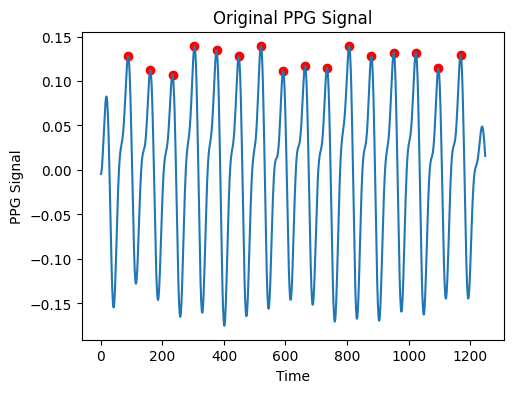

In [47]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1250), minus_ppg) #diff 1 time 1250 -> 1249
plt.scatter(locs_minus, pks_minus['peak_heights'],color="red")
plt.xlabel('Time')
plt.ylabel('PPG Signal')
plt.title('Original PPG Signal')

In [48]:
#features

In [51]:
#create Dataframe of Features
column_names = ["Heart_Rate", "md_so","md_sd", "t_sd","md_do", "sd_r", "AUC", "BMI","Age","Time-from-meal"]
# input_data = pd.DataFrame(features, columns=column_names)

In [52]:
patient_data = pd.read_csv("Data1TestingTheModel.csv", index_col=0)
patient_data

,BGL,Time-from-meal,Age,Heart_Rate,md_so,md_sd,t_sd,md_do,sd_r,AUC,BMI
Name,,,,,,,,,,,
Jason,122,20820,25,108,0.039886,0.01643,0.157333,0.023456,0.411929,-0.12283,27


In [55]:
# input_data = features.iloc[:,1,2,3]
# input_data

In [54]:
input_data = patient_data.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
input_data

,Time-from-meal,Age,Heart_Rate,md_so,md_sd,t_sd,md_do,sd_r,AUC,BMI
Name,,,,,,,,,,
Jason,20820,25,108,0.039886,0.01643,0.157333,0.023456,0.411929,-0.12283,27


In [66]:
Time_from_meal = patient_data.iloc[:,[1]].values
Time_from_meal

array([[20820]])

In [57]:
predicted_BGL = loaded_model.predict(input_data)

In [58]:
#predicted_BGL

In [59]:
predicted_BGL = 140

In [62]:
if Time_from_meal.values <7200:
  if predicted_BGL > 200:
    print("diabetes")
  elif predicted_BGL <= 199 and predicted_BGL >= 140:
    print("diabetes")
  elif predicted_BGL <= 139:
    print("Non diabetes")
else:
  if predicted_BGL > 126:
    print("diabetes")
  elif predicted_BGL <= 125 and predicted_BGL >= 100:
    print("diabetes")
  elif predicted_BGL <= 99:
    print("Non diabetes")

AttributeError: 'numpy.ndarray' object has no attribute 'values'